<a href="https://colab.research.google.com/github/roshank1605A04/Student-s-Performance-Analytics/blob/master/Student_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
data = pd.read_csv('drive/My Drive/Projects/Students Performance/StudentsPerformance.csv')

print(data.shape)

data.head()

(1000, 8)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [0]:
data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [0]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [0]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

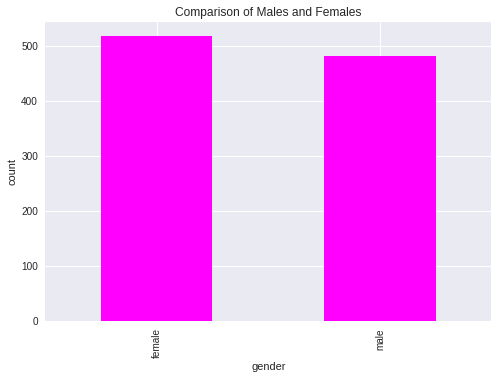

In [0]:
# visualising the number of male and female in the dataset

data['gender'].value_counts(normalize = True)
data['gender'].value_counts(dropna = False).plot.bar(color = 'magenta')
plt.title('Comparison of Males and Females')
plt.xlabel('gender')
plt.ylabel('count')
plt.show()

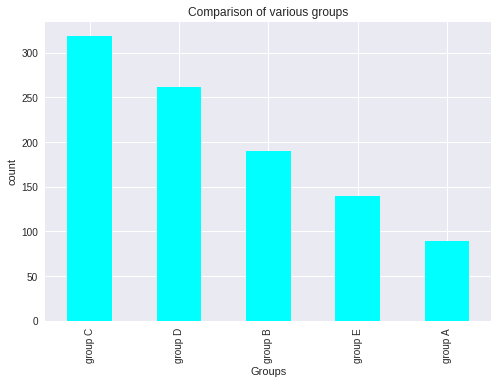

In [0]:
# visualizing the different groups in the dataset

data['race/ethnicity'].value_counts(normalize = True)
data['race/ethnicity'].value_counts(dropna = False).plot.bar(color = 'cyan')
plt.title('Comparison of various groups')
plt.xlabel('Groups')
plt.ylabel('count')
plt.show()

In [0]:
data['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

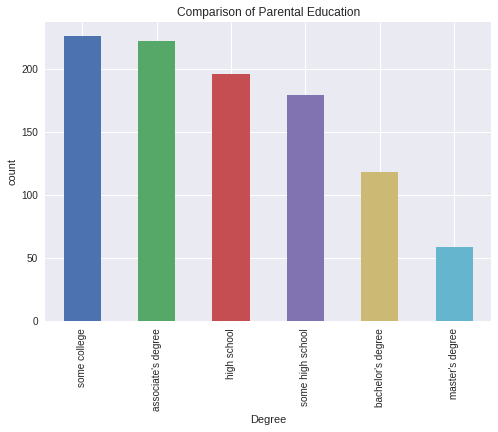

In [0]:
# visualizing the differnt parental education levels

data['parental level of education'].value_counts(normalize = True)
data['parental level of education'].value_counts(dropna = False).plot.bar()
plt.title('Comparison of Parental Education')
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

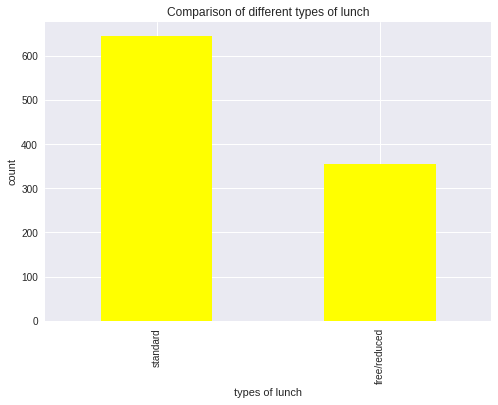

In [0]:
# visualizing different types of lunch 

data['lunch'].value_counts(normalize = True)
data['lunch'].value_counts(dropna = False).plot.bar(color = 'yellow')
plt.title('Comparison of different types of lunch')
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

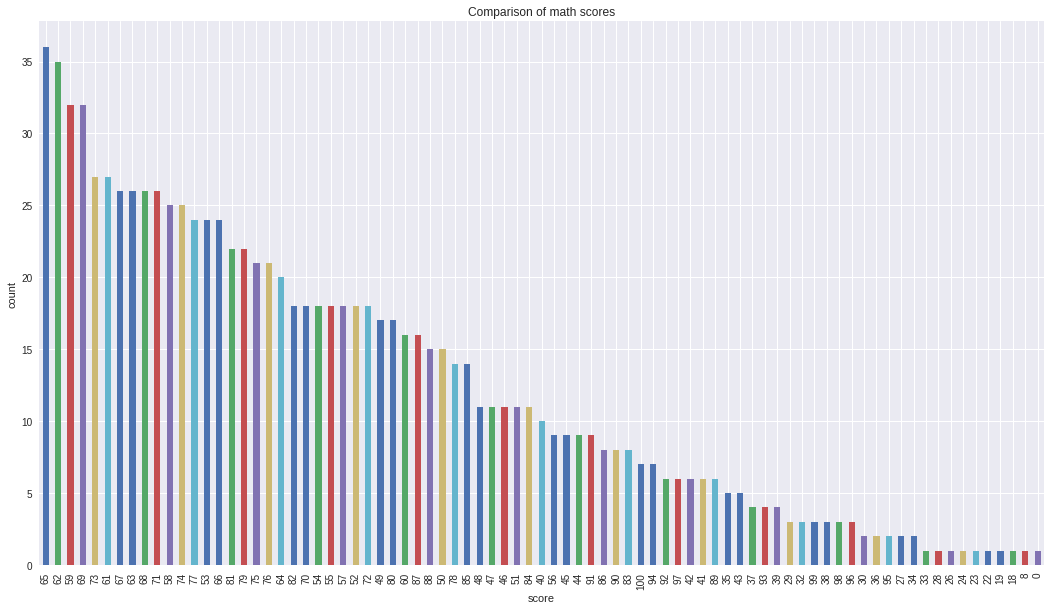

In [0]:
# visualizing maths score

data['math score'].value_counts(normalize = True)
data['math score'].value_counts(dropna = False).plot.bar(figsize = (18, 10))
plt.title('Comparison of math scores')
plt.xlabel('score')
plt.ylabel('count')
plt.show()

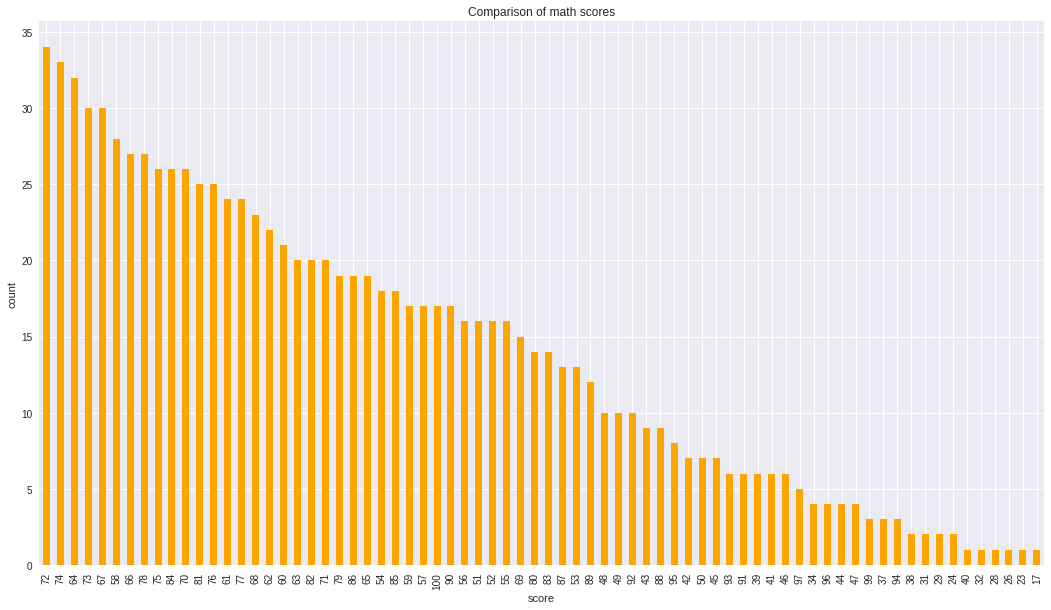

In [0]:
# visualizing reading score score

data['reading score'].value_counts(normalize = True)
data['reading score'].value_counts(dropna = False).plot.bar(figsize = (18, 10), color = 'orange')
plt.title('Comparison of math scores')
plt.xlabel('score')
plt.ylabel('count')
plt.show()

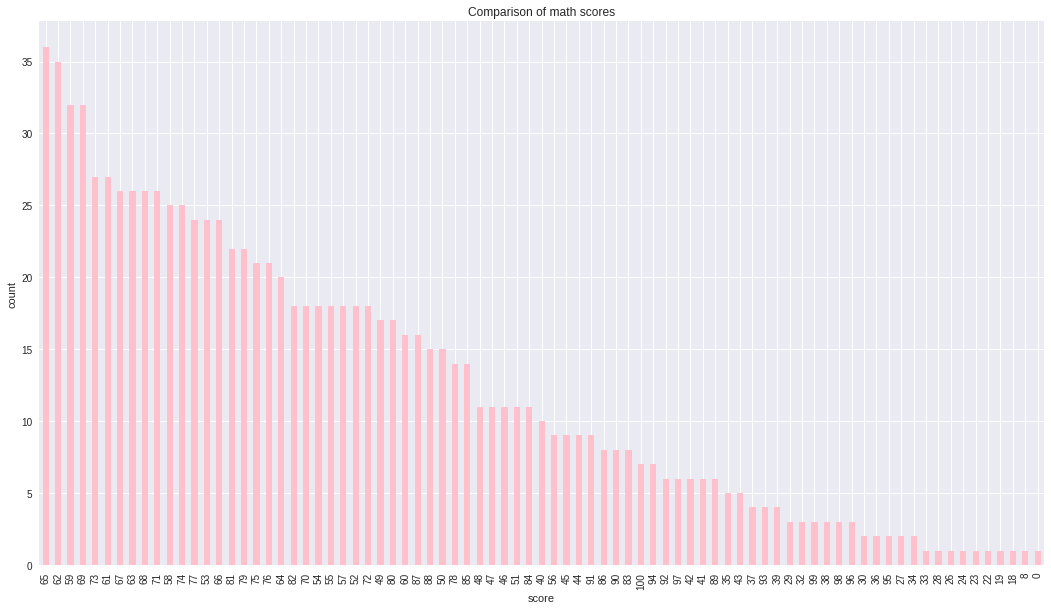

In [0]:
# visualizing writing score

data['math score'].value_counts(normalize = True)
data['math score'].value_counts(dropna = False).plot.bar(figsize = (18, 10), color = 'pink')
plt.title('Comparison of math scores')
plt.xlabel('score')
plt.ylabel('count')
plt.show()

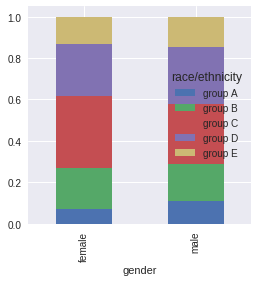

In [0]:
# gender vs race/etnicity 

x = pd.crosstab(data['gender'], data['race/ethnicity'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4, 4))

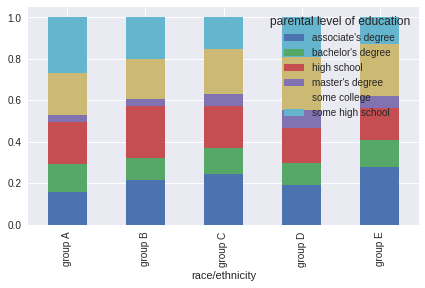

In [0]:
# comparison of race/ethnicity and parental level of education

x = pd.crosstab(data['race/ethnicity'], data['parental level of education'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = 'True', figsize = (7, 4) )

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


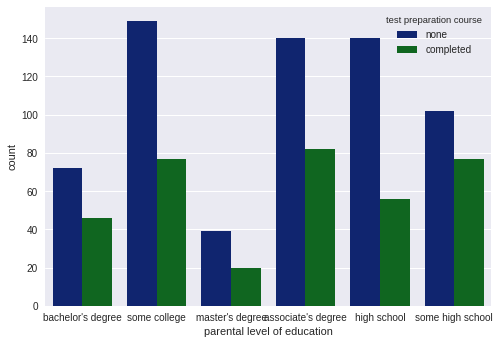

In [0]:
# comparison of parental degree and test course

sns.countplot(x = 'parental level of education', data = data, hue = 'test preparation course', palette = 'dark')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


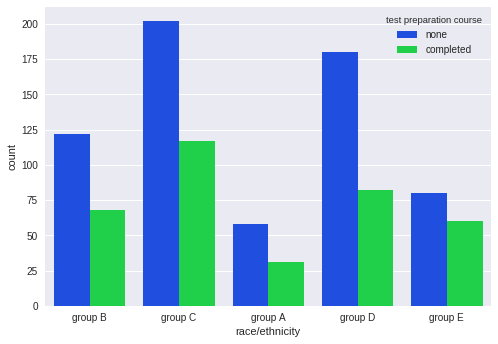

In [0]:
# comparison of race/ethnicity and test preparation course

sns.countplot(x = 'race/ethnicity', data = data,  hue = 'test preparation course', palette = 'bright')
plt.show()

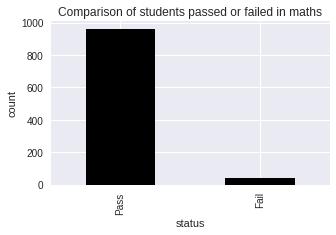

In [0]:
# feature engineering on the data to visualize and solve the dataset more accurately

# setting a passing mark for the students to pass on the three subjects individually
passmarks = 40

# creating a new column pass_math, this column will tell us whether the students are pass or fail
data['pass_math'] = np.where(data['math score']< passmarks, 'Fail', 'Pass')
data['pass_math'].value_counts(dropna = False).plot.bar(color = 'black', figsize = (5, 3))

plt.title('Comparison of students passed or failed in maths')
plt.xlabel('status')
plt.ylabel('count')
plt.show()

In [0]:
data['pass_math'].value_counts()

Pass    960
Fail     40
Name: pass_math, dtype: int64

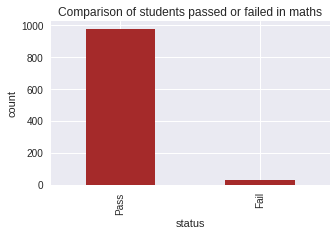

In [0]:
# creating a new column pass_math, this column will tell us whether the students are pass or fail
data['pass_reading'] = np.where(data['reading score']< passmarks, 'Fail', 'Pass')
data['pass_reading'].value_counts(dropna = False).plot.bar(color = 'brown', figsize = (5, 3))

plt.title('Comparison of students passed or failed in maths')
plt.xlabel('status')
plt.ylabel('count')
plt.show()

In [0]:
data['pass_reading'].value_counts(dropna = False)

Pass    974
Fail     26
Name: pass_reading, dtype: int64

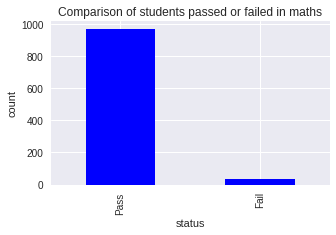

In [0]:
# creating a new column pass_math, this column will tell us whether the students are pass or fail
data['pass_writing'] = np.where(data['writing score']< passmarks, 'Fail', 'Pass')
data['pass_writing'].value_counts(dropna = False).plot.bar(color = 'blue', figsize = (5, 3))

plt.title('Comparison of students passed or failed in maths')
plt.xlabel('status')
plt.ylabel('count')
plt.show()

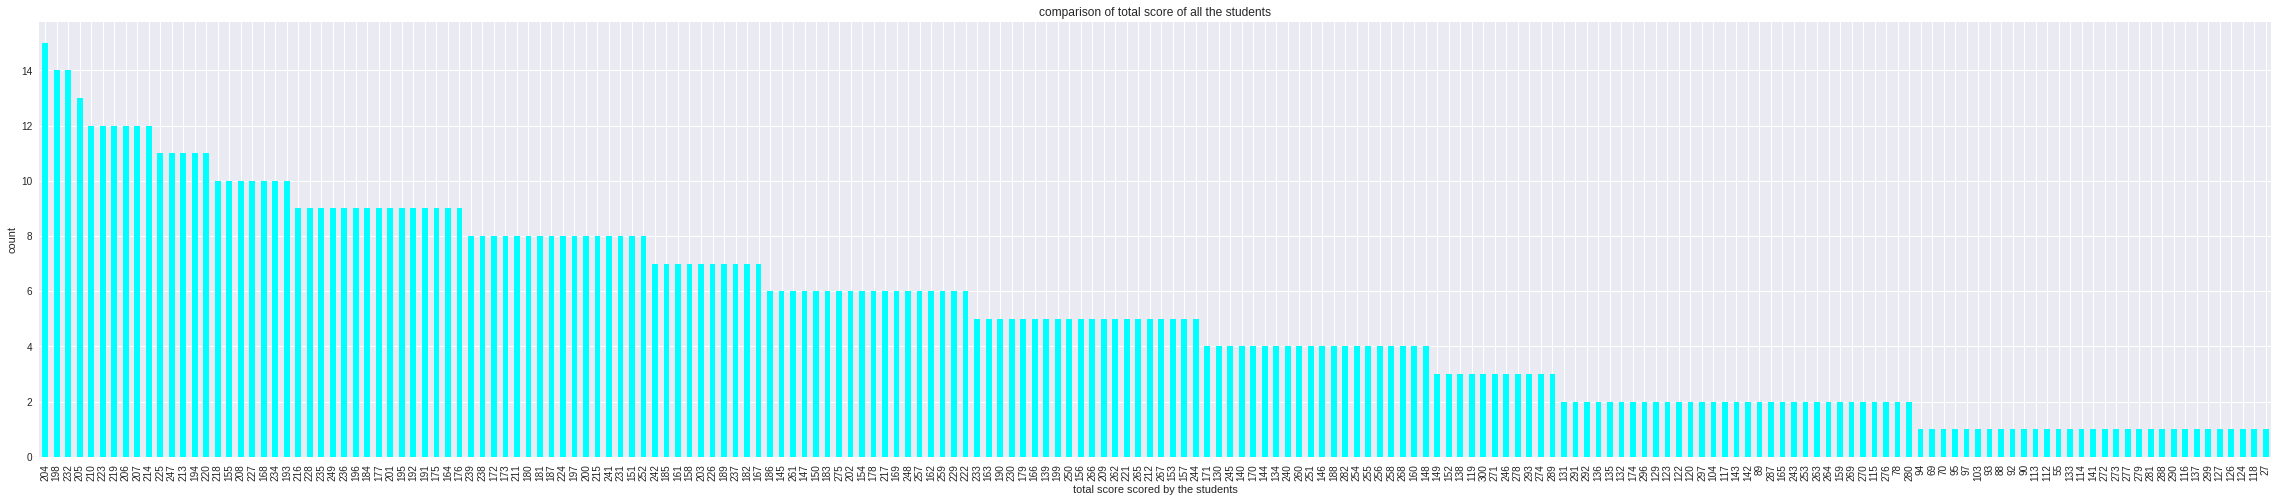

In [0]:
# computing the total score for each student

data['total_score'] = data['math score'] + data['reading score'] + data['writing score']

data['total_score'].value_counts(normalize = True)
data['total_score'].value_counts(dropna = True).plot.bar(color = 'cyan', figsize = (40, 8))

plt.title('comparison of total score of all the students')
plt.xlabel('total score scored by the students')
plt.ylabel('count')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


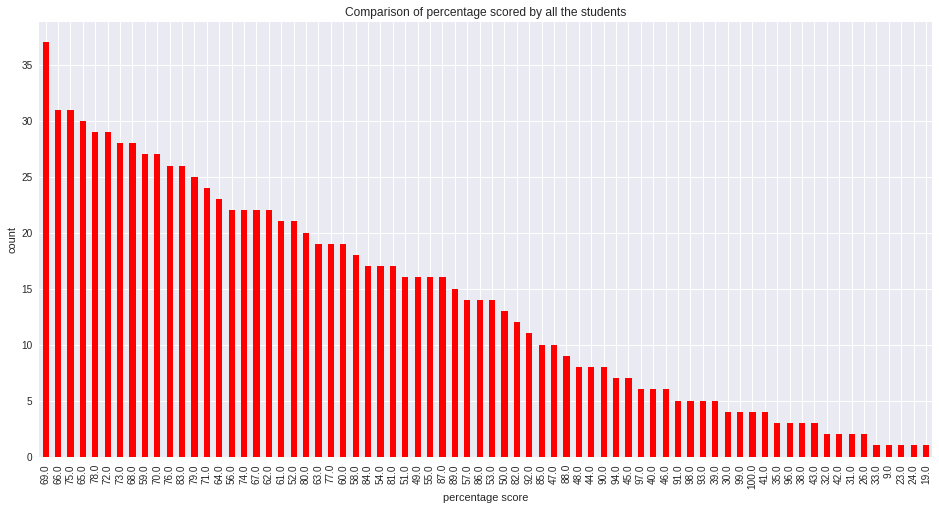

In [0]:
# computing percentage for each of the students
# importing math library to use ceil
from math import * 

data['percentage'] = data['total_score']/3

for i in range(0, 1000):
  data['percentage'][i] = ceil(data['percentage'][i])

data['percentage'].value_counts(normalize = True)
data['percentage'].value_counts(dropna = False).plot.bar(figsize = (16, 8), color = 'red')

plt.title('Comparison of percentage scored by all the students')
plt.xlabel('percentage score')
plt.ylabel('count')
plt.show()

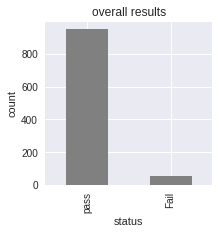

In [0]:
# checking which student is fail overall

data['status'] = data.apply(lambda x : 'Fail' if x['pass_math'] == 'Fail' or 
                           x['pass_reading'] == 'Fail' or x['pass_writing'] == 'Fail'
                           else 'pass', axis = 1)

data['status'].value_counts(dropna = False).plot.bar(color = 'gray', figsize = (3, 3))
plt.title('overall results')
plt.xlabel('status')
plt.ylabel('count')
plt.show()

In [0]:
# Assigning grades to the grades according to the following criteria :
# 0  - 40 marks : grade E
# 41 - 60 marks : grade D
# 60 - 70 marks : grade C
# 70 - 80 marks : grade B
# 80 - 90 marks : grade A
# 90 - 100 marks : grade O

def getgrade(percentage, status):
  if status == 'Fail':
    return 'E'
  if(percentage >= 90):
    return 'O'
  if(percentage >= 80):
    return 'A'
  if(percentage >= 70):
    return 'B'
  if(percentage >= 60):
    return 'C'
  if(percentage >= 40):
    return 'D'
  else :
    return 'E'

data['grades'] = data.apply(lambda x: getgrade(x['percentage'], x['status']), axis = 1 )

data['grades'].value_counts()

B    260
C    252
D    223
A    156
O     58
E     51
Name: grades, dtype: int64

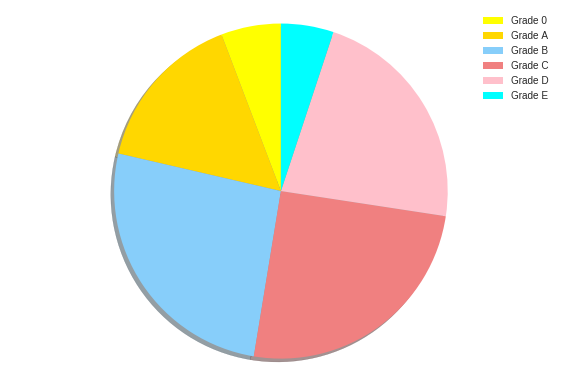

In [0]:
# plotting a pie chart for the distribution of various grades amongst the students

labels = ['Grade 0', 'Grade A', 'Grade B', 'Grade C', 'Grade D', 'Grade E']
sizes = [58, 156, 260, 252, 223, 51]
colors = ['yellow', 'gold', 'lightskyblue', 'lightcoral', 'pink', 'cyan']
explode = (0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001)

patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels)
plt.axis('equal')
plt.tight_layout()
plt.show()

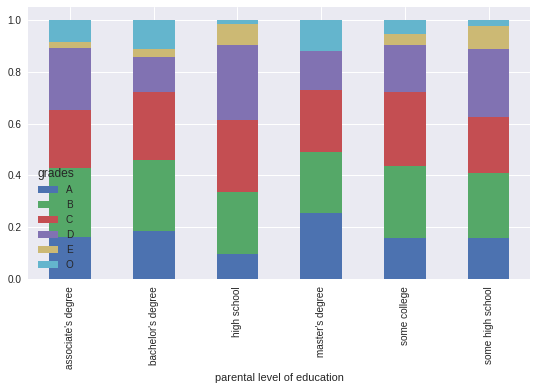

In [0]:
# comparison parent's degree and their corresponding grades

x = pd.crosstab(data['parental level of education'], data['grades'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (9, 5))

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


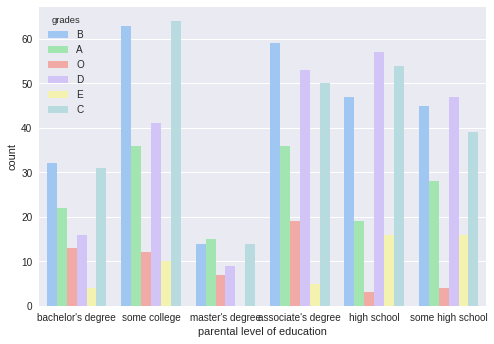

In [0]:
# for better visualization we will plot it again using seaborn

sns.countplot(x = data['parental level of education'], data = data, hue = data['grades'], palette = 'pastel')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


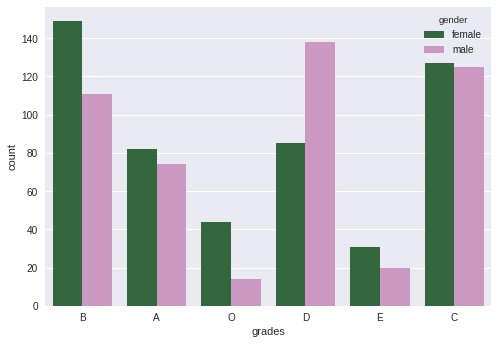

In [0]:
# comparing the distribution of grades among males and females

sns.countplot(x = data['grades'], data = data, hue = data['gender'], palette = 'cubehelix')
#sns.palplot(sns.dark_palette('purple'))
plt.show()

In [0]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,pass_math,pass_reading,pass_writing,total_score,percentage,status,grades
0,female,group B,bachelor's degree,standard,none,72,72,74,Pass,Pass,Pass,218,73.0,pass,B
1,female,group C,some college,standard,completed,69,90,88,Pass,Pass,Pass,247,83.0,pass,A
2,female,group B,master's degree,standard,none,90,95,93,Pass,Pass,Pass,278,93.0,pass,O
3,male,group A,associate's degree,free/reduced,none,47,57,44,Pass,Pass,Pass,148,50.0,pass,D
4,male,group C,some college,standard,none,76,78,75,Pass,Pass,Pass,229,77.0,pass,B


In [0]:
data.describe()

,math score,reading score,writing score,total_score,percentage
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000,68.105000
std,15.16308,14.600192,15.195657,42.771978,14.258095
min,0.00000,17.000000,10.000000,27.000000,9.000000
25%,57.00000,59.000000,57.750000,175.000000,59.000000
50%,66.00000,70.000000,69.000000,205.000000,69.000000
75%,77.00000,79.000000,79.000000,233.000000,78.000000
max,100.00000,100.000000,100.000000,300.000000,100.000000


In [0]:
from sklearn.preprocessing import LabelEncoder

# creating an encoder
le = LabelEncoder()

# label encoding for test preparation course
data['test preparation course'] = le.fit_transform(data['test preparation course'])
data['test preparation course'].value_counts()

1    642
0    358
Name: test preparation course, dtype: int64

In [0]:
# label encoding for lunch

data['lunch'] = le.fit_transform(data['lunch'])
data['lunch'].value_counts()

1    645
0    355
Name: lunch, dtype: int64

In [0]:
# label encoding for race/ethnicity
# we have to map values to each of the categories

data['race/ethnicity'] = data['race/ethnicity'].replace('group A', 1)
data['race/ethnicity'] = data['race/ethnicity'].replace('group B', 2)
data['race/ethnicity'] = data['race/ethnicity'].replace('group C', 3)
data['race/ethnicity'] = data['race/ethnicity'].replace('group D', 4)
data['race/ethnicity'] = data['race/ethnicity'].replace('group E', 5)

data['race/ethnicity'].value_counts()

3    319
4    262
2    190
5    140
1     89
Name: race/ethnicity, dtype: int64

In [0]:
# label encoding for parental level of education

data['parental level of education'] = le.fit_transform(data['parental level of education'])
data['parental level of education'].value_counts()

4    226
0    222
2    196
5    179
1    118
3     59
Name: parental level of education, dtype: int64

In [0]:
# label encoding for gender

data['gender'] = le.fit_transform(data['gender'])
data['gender'].value_counts()

0    518
1    482
Name: gender, dtype: int64

In [0]:
# label encoding for pass_math

data['pass_math'] = le.fit_transform(data['pass_math'])
data['pass_math'].value_counts()

1    960
0     40
Name: pass_math, dtype: int64

In [0]:
# label encoding for pass_reading

data['pass_reading'] = le.fit_transform(data['pass_reading'])
data['pass_reading'].value_counts()

1    974
0     26
Name: pass_reading, dtype: int64

In [0]:
# label encoding for pass_writing

data['pass_writing'] = le.fit_transform(data['pass_writing'])
data['pass_writing'].value_counts()

1    968
0     32
Name: pass_writing, dtype: int64

In [0]:
# label encoding for status

data['status'] = le.fit_transform(data['status'])
data['status'].value_counts()

1    949
0     51
Name: status, dtype: int64

In [0]:
# label encoding for grades
# we have to map values to each of the categories

data['grades'] = data['grades'].replace('O', 0)
data['grades'] = data['grades'].replace('A', 1)
data['grades'] = data['grades'].replace('B', 2)
data['grades'] = data['grades'].replace('C', 3)
data['grades'] = data['grades'].replace('D', 4)
data['grades'] = data['grades'].replace('E', 5)

data['race/ethnicity'].value_counts()

3    319
4    262
2    190
5    140
1     89
Name: race/ethnicity, dtype: int64

In [0]:
data.shape

(1000, 15)

In [0]:
# splitting the dependent and independent variables

x = data.iloc[:,:14]
y = data.iloc[:,14]

print(x.shape)
print(y.shape)

(1000, 14)
(1000,)


In [0]:
# splitting the dataset into training and test sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 45)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(750, 14)
(750,)
(250, 14)
(250,)


In [0]:
# importing the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# creating a scaler
mm = MinMaxScaler()

# feeding the independent variable into the scaler
x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [0]:
# applying principal components analysis

from sklearn.decomposition import PCA

# creating a principal component analysis model
#pca = PCA(n_components = None)

# feeding the independent variables to the PCA model
#x_train = pca.fit_transform(x_train)
#x_test = pca.transform(x_test)

# visualising the principal components that will explain the highest share of variance
#explained_variance = pca.explained_variance_ratio_
#print(explained_variance)

# creating a principal component analysis model
#pca = PCA(n_components = 2)

# feeding the independent variables to the PCA model
#x_train = pca.fit_transform(x_train)
#x_test = pca.transform(x_test)

**Modelling**

**Logistic Regression**

In [0]:
from sklearn.linear_model import  LogisticRegression

# creating a model
model = LogisticRegression()

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the classification accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))


Training Accuracy : 0.7786666666666666
Testing Accuracy : 0.768


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [0]:
# printing the confusion matrix

from sklearn.metrics import confusion_matrix

# creating a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# printing the confusion matrix
print(cm)

[[ 2  9  0  0  0  0]
 [ 0 15 17  0  0  0]
 [ 0  2 56 14  0  0]
 [ 0  0  6 44  8  0]
 [ 0  0  0  2 59  0]
 [ 0  0  0  0  0 16]]


**Random Forest**

In [0]:
from sklearn.ensemble import RandomForestClassifier

# creating a model
model = RandomForestClassifier()

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the x-test results
y_pred = model.predict(x_test)

# calculating the accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.996


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:
# printing the confusion matrix

from sklearn.metrics import confusion_matrix

# creating a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# printing the confusion matrix
print(cm)

[[11  0  0  0  0  0]
 [ 0 32  0  0  0  0]
 [ 0  0 72  0  0  0]
 [ 0  0  0 58  0  0]
 [ 0  0  0  0 61  0]
 [ 0  0  0  0  1 15]]


In [0]:
# k fold cross validation 

from sklearn.model_selection import cross_val_score

# computing accuracies for 20 different model's accuracy
accuracies = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 20)
print(accuracies)

# computing mean of accuaracies obtained by all the models
print("mean accuracy :", accuracies.mean())

# computing the standard variance of the models
print("mean standard variance :", accuracies.std())

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
mean accuracy : 1.0
mean standard variance : 0.0


**Decision Forest**

In [0]:
from sklearn.tree import DecisionTreeClassifier

# creating a model
model = DecisionTreeClassifier()

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the x-test results
y_pred = model.predict(x_test)

# calculating the accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 1.0


In [0]:
# printing the confusion matrix

from sklearn.metrics import confusion_matrix

# creating a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# printing the confusion matrix
print(cm)

[[11  0  0  0  0  0]
 [ 0 32  0  0  0  0]
 [ 0  0 72  0  0  0]
 [ 0  0  0 58  0  0]
 [ 0  0  0  0 61  0]
 [ 0  0  0  0  0 16]]


In [0]:
# k fold cross validation 

from sklearn.model_selection import cross_val_score

# computing accuracies for 20 different model's accuracy
accuracies = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 20)
print(accuracies)

# computing mean of accuaracies obtained by all the models
print("mean accuracy :", accuracies.mean())

# computing the standard variance of the models
print("mean standard variance :", accuracies.std())
   

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
mean accuracy : 1.0
mean standard variance : 0.0


**Support Vector Machine**

In [0]:
from sklearn.svm import SVC

# creating a model
model = SVC()

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the x-test results
y_pred = model.predict(x_test)

# calculating the accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.732
Testing Accuracy : 0.76


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [0]:
# printing the confusion matrix

from sklearn.metrics import confusion_matrix

# creating a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# printing the confusion matrix
print(cm)

[[ 0 11  0  0  0  0]
 [ 0  9 23  0  0  0]
 [ 0  0 64  8  0  0]
 [ 0  0  5 50  3  0]
 [ 0  0  0 10 51  0]
 [ 0  0  0  0  0 16]]
